In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
def format_indian_number(value):
    if value >= 10000000:
        return f"{value / 10000000:.2f} Cr"
    elif value >= 100000:
        return f"{value / 100000:.2f} Lakh"
    elif value >= 1000:
        return f"{value / 1000:.2f} K"
    else:
        return str(value)

In [38]:
# Load dataset
df = pd.read_csv("C:\\Users\\Samir\\OneDrive\\Desktop\\export ores & minerals.csv")

In [39]:
# Converting relevant columns to numerical values (if needed)
df['Value - 2015-16'] = pd.to_numeric(df['Value - 2015-16'], errors='coerce')
df['Value - 2016-17'] = pd.to_numeric(df['Value - 2016-17'], errors='coerce')
df['Value - 2017-18'] = pd.to_numeric(df['Value - 2017-18'], errors='coerce')

In [40]:
# Applying number format to value columns
df['Value - 2015-16 Formatted'] = df['Value - 2015-16'].apply(format_indian_number)
df['Value - 2016-17 Formatted'] = df['Value - 2016-17'].apply(format_indian_number)
df['Value - 2017-18 Formatted'] = df['Value - 2017-18'].apply(format_indian_number)

In [41]:
# Growth Calculation
df['Value Growth'] = df['Value - 2017-18'] - df['Value - 2016-17']
df['Value Growth Formatted'] = df['Value Growth'].apply(format_indian_number)

In [42]:
# Q1: Total Export Value for Each Mineral Over Three Years
df['Total Export Value'] = df[['Value - 2015-16', 'Value - 2016-17', 'Value - 2017-18']].sum(axis=1)
print("Total Export Value for Each Mineral Over Three Years:")
print(df[['Ores & Minerals', 'Total Export Value']])


Total Export Value for Each Mineral Over Three Years:
            Ores & Minerals  Total Export Value
0              All Minerals        5.701974e+09
1        Abrasive (Natural)        5.518470e+05
2                 Alabaster        2.810000e+02
3                   Alumina        8.888768e+07
4                Andalusite        2.390000e+03
..                      ...                 ...
136               Witherite        7.760000e+02
137            Wollastonite        7.977060e+05
138       Zinc Ores & Conc.        4.032982e+06
139  Zirconium Ores & Conc.        3.682120e+05
140      Other Minerals Nes        5.370572e+06

[141 rows x 2 columns]


In [43]:

# Q2: Percentage Contribution of Each Mineral in 2017-18
df['Percentage Contribution 2017-18'] = (df['Value - 2017-18'] / df['Value - 2017-18'].sum()) * 100
print("Percentage Contribution of Each Mineral in 2017-18:")
print(df[['Ores & Minerals', 'Percentage Contribution 2017-18']])


Percentage Contribution of Each Mineral in 2017-18:
            Ores & Minerals  Percentage Contribution 2017-18
0              All Minerals                     3.398078e+01
1        Abrasive (Natural)                     7.258000e-03
2                 Alabaster                     6.996831e-07
3                   Alumina                     5.625025e-01
4                Andalusite                     5.580399e-06
..                      ...                              ...
136               Witherite                     5.443876e-06
137            Wollastonite                     3.838342e-03
138       Zinc Ores & Conc.                     5.368788e-04
139  Zirconium Ores & Conc.                     5.312472e-04
140      Other Minerals Nes                     4.278861e-02

[141 rows x 2 columns]


In [44]:
# Q3: Mineral with the Highest Growth in Export Value
top_growth = df.loc[df['Value Growth'].idxmax()]
print("Mineral with the Highest Growth in Export Value:")
print(top_growth[['Ores & Minerals', 'Value Growth']])

Mineral with the Highest Growth in Export Value:
Ores & Minerals    Iron Ore Pellates
Value Growth              11118847.0
Name: 64, dtype: object


In [45]:
# Q4: Rank Minerals by Export Value in 2017-18
df['Rank 2017-18'] = df['Value - 2017-18'].rank(ascending=False, method='dense')
print("Rank Minerals by Export Value in 2017-18:")
print(df[['Ores & Minerals', 'Rank 2017-18']])

Rank Minerals by Export Value in 2017-18:
            Ores & Minerals  Rank 2017-18
0              All Minerals           1.0
1        Abrasive (Natural)          65.0
2                 Alabaster         136.0
3                   Alumina           8.0
4                Andalusite         128.0
..                      ...           ...
136               Witherite         129.0
137            Wollastonite          80.0
138       Zinc Ores & Conc.          94.0
139  Zirconium Ores & Conc.          95.0
140      Other Minerals Nes          42.0

[141 rows x 2 columns]


In [46]:
# Q5: Year with the Highest Export Value for Each Mineral
df['Highest Year'] = df[['Value - 2015-16', 'Value - 2016-17', 'Value - 2017-18']].idxmax(axis=1)
print("Year with the Highest Export Value for Each Mineral:")
print(df[['Ores & Minerals', 'Highest Year']])


Year with the Highest Export Value for Each Mineral:
            Ores & Minerals     Highest Year
0              All Minerals  Value - 2016-17
1        Abrasive (Natural)  Value - 2017-18
2                 Alabaster  Value - 2016-17
3                   Alumina  Value - 2017-18
4                Andalusite  Value - 2016-17
..                      ...              ...
136               Witherite  Value - 2017-18
137            Wollastonite  Value - 2016-17
138       Zinc Ores & Conc.  Value - 2016-17
139  Zirconium Ores & Conc.  Value - 2015-16
140      Other Minerals Nes  Value - 2017-18

[141 rows x 2 columns]


Total Export Value for All Minerals Per Year:
Value - 2015-16    5.012611e+09
Value - 2016-17    5.893183e+09
Value - 2017-18    5.859796e+09
dtype: float64


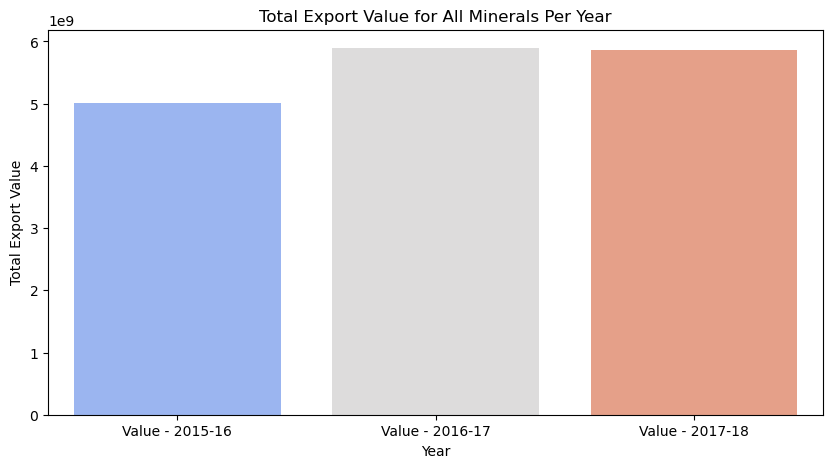

In [47]:
# Q6: Total Export Value for All Minerals Per Year
total_exports_per_year = df[['Value - 2015-16', 'Value - 2016-17', 'Value - 2017-18']].sum()
print("Total Export Value for All Minerals Per Year:")
print(total_exports_per_year)

plt.figure(figsize=(10, 5))
sns.barplot(x=total_exports_per_year.index, y=total_exports_per_year.values, palette='coolwarm')
plt.xlabel("Year")
plt.ylabel("Total Export Value")
plt.title("Total Export Value for All Minerals Per Year")
plt.show()

In [48]:
# Q7: Compare Export Growth Between 2015-16 and 2017-18 for Each Mineral
df['Growth 2015-16 to 2017-18'] = df['Value - 2017-18'] - df['Value - 2015-16']
print("Compare Export Growth Between 2015-16 and 2017-18 for Each Mineral:")
print(df[['Ores & Minerals', 'Growth 2015-16 to 2017-18']])

Compare Export Growth Between 2015-16 and 2017-18 for Each Mineral:
            Ores & Minerals  Growth 2015-16 to 2017-18
0              All Minerals                281741153.0
1        Abrasive (Natural)                   365410.0
2                 Alabaster                        NaN
3                   Alumina                  7065736.0
4                Andalusite                        NaN
..                      ...                        ...
136               Witherite                       78.0
137            Wollastonite                   -54344.0
138       Zinc Ores & Conc.                    20114.0
139  Zirconium Ores & Conc.                  -210770.0
140      Other Minerals Nes                  1307272.0

[141 rows x 2 columns]
